Hola **Alejandro**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip**: Para darle una mejor presentación al notebook puedes redactar un título más descriptivo hacia el objetivo del proyecto y una breve introducción del mismo para que sea claro desde un inicio que se realizará y por qué
</div>

## Proyecto Sprint 11

Como analistas de datos, necesitamos entender si las estrategias llevadas a cabo por alguna empresa, compañía o grupo ha surtido efecto para alcanzar sus objetivos y confirmar si se ha tenido el éxito esperado. El presente documento tiene como objetivo demostrar si una empresa ha logrado con sus estrategias influir en sus clientes para poder realizar más compras por medio de una página web utilizando el análisis de eventos y el embudo de ventas. Se estudiará el comportamiento de varios clientes asignados en grupos y probaremos hipótesis sobre los cambios en sus comportamientos para llegar a la conclusión de si las estrategias llevadas a cabo por la empresa han sido satisfactorias.

## Lectura de datos ## 

In [38]:
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import math as mth



log = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\t')

print(log)



                      EventName         DeviceIDHash  EventTimestamp  ExpId
0              MainScreenAppear  4575588528974610257      1564029816    246
1              MainScreenAppear  7416695313311560658      1564053102    246
2       PaymentScreenSuccessful  3518123091307005509      1564054127    248
3              CartScreenAppear  3518123091307005509      1564054127    248
4       PaymentScreenSuccessful  6217807653094995999      1564055322    248
...                         ...                  ...             ...    ...
244121         MainScreenAppear  4599628364049201812      1565212345    247
244122         MainScreenAppear  5849806612437486590      1565212439    246
244123         MainScreenAppear  5746969938801999050      1565212483    246
244124         MainScreenAppear  5746969938801999050      1565212498    246
244125       OffersScreenAppear  5746969938801999050      1565212517    246

[244126 rows x 4 columns]


In [2]:
# Cambio los nombres de las columnas
log.columns = ['event', 'deviceId', 'eventtime', 'group']

# convierto la columna de 'eventtime' a formato datetime
log['eventtime'] = log['eventtime'].map(lambda x: datetime.utcfromtimestamp(x))
print(log)
print(log.info())

                          event             deviceId           eventtime  \
0              MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1              MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2       PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3              CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4       PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
...                         ...                  ...                 ...   
244121         MainScreenAppear  4599628364049201812 2019-08-07 21:12:25   
244122         MainScreenAppear  5849806612437486590 2019-08-07 21:13:59   
244123         MainScreenAppear  5746969938801999050 2019-08-07 21:14:43   
244124         MainScreenAppear  5746969938801999050 2019-08-07 21:14:58   
244125       OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17   

        group  
0         246  
1         246  
2         248  
3         248  
4      

In [3]:
log['date'] = log['eventtime'].dt.date
print(log.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      244126 non-null  object        
 1   deviceId   244126 non-null  int64         
 2   eventtime  244126 non-null  datetime64[ns]
 3   group      244126 non-null  int64         
 4   date       244126 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecha la revisión inicial de los datos para tu análisis, siempre es importante revisar la calidad de tus datos y realizar las transformaciones necesarias 
</div>

### Cuántos eventos hay en los registros? ###

In [4]:
number_events = log['event'].count()
print(number_events)
print(log)

244126
                          event             deviceId           eventtime  \
0              MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1              MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2       PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3              CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4       PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
...                         ...                  ...                 ...   
244121         MainScreenAppear  4599628364049201812 2019-08-07 21:12:25   
244122         MainScreenAppear  5849806612437486590 2019-08-07 21:13:59   
244123         MainScreenAppear  5746969938801999050 2019-08-07 21:14:43   
244124         MainScreenAppear  5746969938801999050 2019-08-07 21:14:58   
244125       OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17   

        group        date  
0         246  2019-07-25  
1         246  2019-07-2

Hay 4 eventos diferentes en el registro, sumando un total de 244126 eventos ocurridos entre esos 4.

### Cuántos usuarios hay en los registros? ###

In [5]:
total_users = log['deviceId'].nunique()
print('La cantidad total de usuarios es de', total_users)

La cantidad total de usuarios es de 7551


### Cuál es el promedio de eventos por usuario? ###

In [27]:
avg_events = round(number_events / total_users)
print('El promedio de eventos en general por usuario es de', avg_events)

total_users_246 = log[log['group'] == 246]['deviceId'].nunique()
total_users_247 = log[log['group'] == 247]['deviceId'].nunique()
total_users_248 = log[log['group'] == 248]['deviceId'].nunique()

number_events_246 = log[log['group'] == 246]['event'].count()
number_events_247 = log[log['group'] == 247]['event'].count()
number_events_248 = log[log['group'] == 248]['event'].count()

avg_events_246 = round(number_events_246 / total_users_246)
avg_events_247 = round(number_events_247 / total_users_247)
avg_events_248 = round(number_events_248 / total_users_248)

print('El promedio de eventos por usuario del grupo 246 es de', avg_events_246)
print('El promedio de eventos por usuario del grupo 247 es de', avg_events_247)
print('El promedio de eventos por usuario del grupo 248 es de', avg_events_248)



El promedio de eventos en general por usuario es de 32
El promedio de eventos por usuario del grupo 246 es de 32
El promedio de eventos por usuario del grupo 247 es de 31
El promedio de eventos por usuario del grupo 248 es de 34


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, aquí cómo recomendación para que le des un plus a tu análisis, es que este tipo de métricas cómo la del promedio de eventos de abajo las calcules por cada grupo cuando se trate de pruebas AB ya que así se puede ir viendo las diferencias desde el inicio.
</div>

### Qué período de tiempo cubren los datos? ###

In [7]:
max_date = log['eventtime'].max()
min_date = log['eventtime'].min()

print('La fecha máxima de los registros es', max_date)
print('La fecha mínima de los registros es', min_date)

La fecha máxima de los registros es 2019-08-07 21:15:17
La fecha mínima de los registros es 2019-07-25 04:43:36


(array([18102., 18104., 18106., 18108., 18109., 18111., 18113., 18115.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

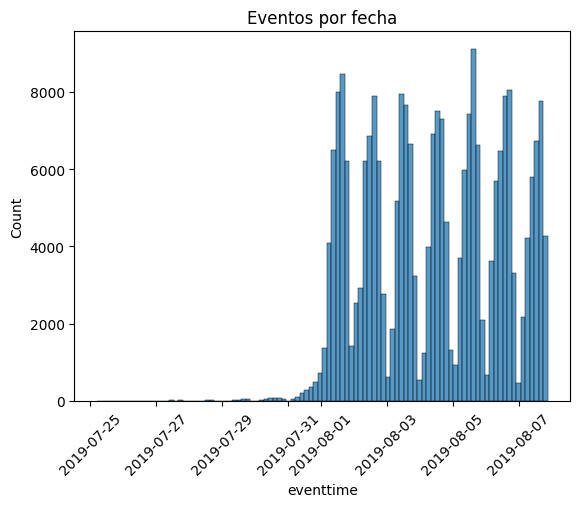

In [8]:
sns.histplot(log['eventtime'], bins=100)
plt.title('Eventos por fecha')
plt.xticks(rotation=45)

In [9]:
cleaned_log = log[log['eventtime'] > '2019-08-01']
print(cleaned_log)

                     event             deviceId           eventtime  group  \
2828              Tutorial  3737462046622621720 2019-08-01 00:07:28    246   
2829      MainScreenAppear  3737462046622621720 2019-08-01 00:08:00    246   
2830      MainScreenAppear  3737462046622621720 2019-08-01 00:08:55    246   
2831    OffersScreenAppear  3737462046622621720 2019-08-01 00:08:58    246   
2832      MainScreenAppear  1433840883824088890 2019-08-01 00:08:59    247   
...                    ...                  ...                 ...    ...   
244121    MainScreenAppear  4599628364049201812 2019-08-07 21:12:25    247   
244122    MainScreenAppear  5849806612437486590 2019-08-07 21:13:59    246   
244123    MainScreenAppear  5746969938801999050 2019-08-07 21:14:43    246   
244124    MainScreenAppear  5746969938801999050 2019-08-07 21:14:58    246   
244125  OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17    246   

              date  
2828    2019-08-01  
2829    2019-08-01  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado! De esta forma las muestras que quedan son más consistentes y se evita incluir datos de fechas que puedan incluir "ruido" al análisis cómo tal.
</div>

De acuerdo al histograma, podemos observar que la mayor cantidad de eventos ocurren a partir del 1 de Agosto de 2019, que sería la segunda semana del total de registros que fueron del 25 de Julio al 7 de Agosto del 2019. Al excluir los eventos antes de la fecha del 1 de Agosto, solo perderemos 2828 registros, lo que representa menos del 1.2% del total de los registros 

## Estudiar el embudo de eventos ##

### Frecuencia de eventos ### 

                     event  deviceId  eventtime   group    date
1         MainScreenAppear    117431     117431  117431  117431
2       OffersScreenAppear     46350      46350   46350   46350
0         CartScreenAppear     42365      42365   42365   42365
3  PaymentScreenSuccessful     34113      34113   34113   34113
4                 Tutorial      1039       1039    1039    1039


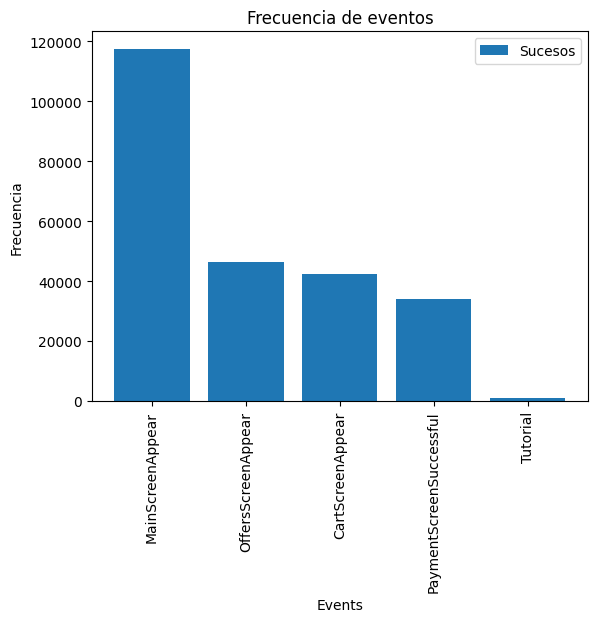

In [10]:
freq_events = cleaned_log.groupby('event', as_index = False).count().sort_values(by = 'deviceId', ascending = False)

plt.bar(freq_events['event'], freq_events['deviceId'], label='Sucesos')

plt.legend()
plt.xticks(rotation=90)
plt.title('Frecuencia de eventos')
plt.ylabel('Frecuencia')
plt.xlabel('Events')

print(freq_events)

El evento MainScreenAppear (Aparición de la pantalla principal) es el evento que más veces sucedió, lo que es lógico ya que generalmente cualquier página de internet tiene la página principal y la mayoría de las personas empiezan a hacer sus compras ingresando primero a esa página. Casos muy raros serían que una persona tenga guradado el URL de un producto de cierta marca que se venda en esa página y sea la que accede desde el inicio, por lo que es de esperarse que la página principal sea la que más sucesos tuvo.

### Usuarios por evento ###

*****Usuarios por evento en general*****
                     event  deviceId      ratio
1         MainScreenAppear      7419  36.864596
2       OffersScreenAppear      4593  22.822360
0         CartScreenAppear      3734  18.554037
3  PaymentScreenSuccessful      3539  17.585093
4                 Tutorial       840   4.173913

*****Usuarios por evento grupo 246*****
                     event  deviceId      ratio
1         MainScreenAppear      2450  36.371734
2       OffersScreenAppear      1542  22.891924
0         CartScreenAppear      1266  18.794537
3  PaymentScreenSuccessful      1200  17.814727
4                 Tutorial       278   4.127078

*****Usuarios por evento grupo 247*****
                     event  deviceId      ratio
1         MainScreenAppear      2476  37.093633
2       OffersScreenAppear      1520  22.771536
0         CartScreenAppear      1238  18.546816
3  PaymentScreenSuccessful      1158  17.348315
4                 Tutorial       283   4.239700

*****Usuario

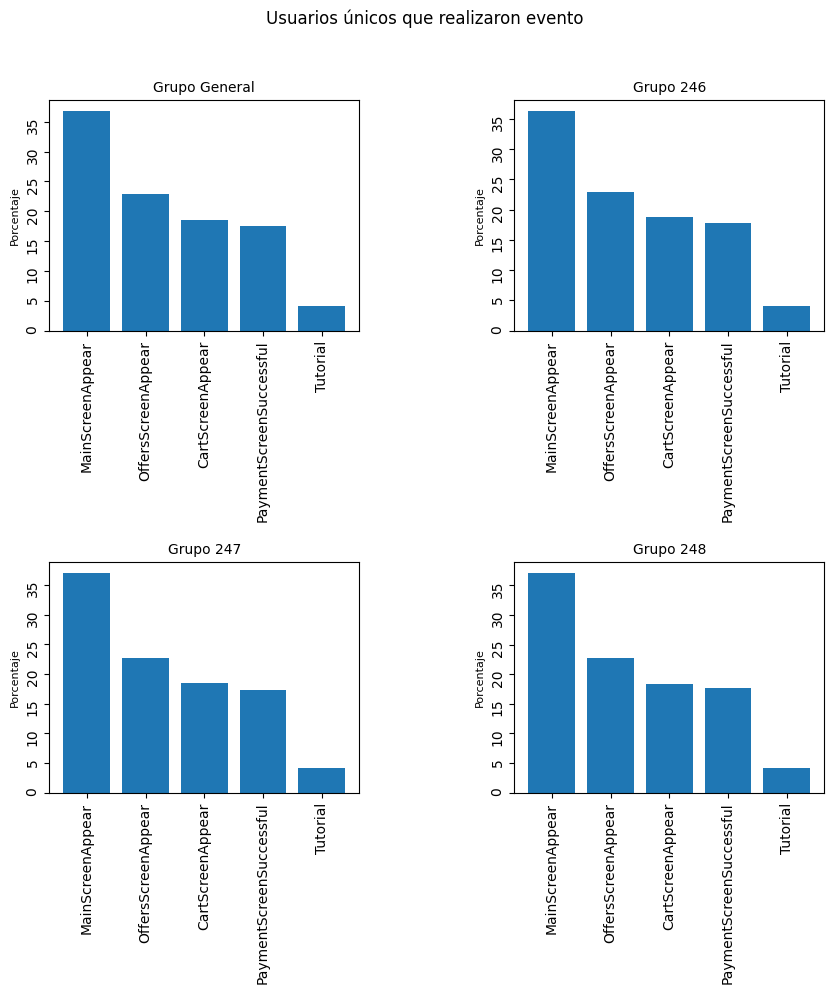

In [101]:
#users_per_event = cleaned_log.groupby(['deviceId', 'event']).count().reset_index()
users_per_event = cleaned_log.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users = sum(users_per_event['deviceId'])
users_per_event['ratio'] = (users_per_event['deviceId'] / unique_total_users) * 100

print('*****Usuarios por evento en general*****')
print(users_per_event)
#-----------------------------------------------------------------------
cleaned_log_246 = cleaned_log[cleaned_log['group'] == 246]
users_per_event_246 = cleaned_log_246.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users_246 = sum(users_per_event_246['deviceId'])
users_per_event_246['ratio'] = (users_per_event_246['deviceId'] / unique_total_users_246) * 100


cleaned_log_247 = cleaned_log[cleaned_log['group'] == 247]
users_per_event_247 = cleaned_log_247.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users_247 = sum(users_per_event_247['deviceId'])
users_per_event_247['ratio'] = (users_per_event_247['deviceId'] / unique_total_users_247) * 100

cleaned_log_248 = cleaned_log[cleaned_log['group'] == 248]
users_per_event_248 = cleaned_log_248.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users_248 = sum(users_per_event_248['deviceId'])
users_per_event_248['ratio'] = (users_per_event_248['deviceId'] / unique_total_users_248) * 100
print()
print('*****Usuarios por evento grupo 246*****')
print(users_per_event_246)
print()
print('*****Usuarios por evento grupo 247*****')
print(users_per_event_247)
print()
print('*****Usuarios por evento grupo 248*****')
print(users_per_event_248)

fig, axs = plt.subplots(2, 2, figsize = (10,9))
axs[0,0].bar(users_per_event['event'],users_per_event['ratio'])
axs[0,0].set_title('Grupo General', fontsize=10)
axs[0,0].set_ylabel('Porcentaje', fontsize=8)
axs[0,0].tick_params(labelrotation=90)

axs[0,1].bar(users_per_event_246['event'],users_per_event_246['ratio'])
axs[0,1].set_title('Grupo 246', fontsize=10)
axs[0,1].set_ylabel('Porcentaje', fontsize=8)
axs[0,1].tick_params(labelrotation=90)


axs[1,0].bar(users_per_event_247['event'],users_per_event_247['ratio'])
axs[1,0].set_title('Grupo 247', fontsize=10)
axs[1,0].set_ylabel('Porcentaje', fontsize=8)
axs[1,0].tick_params(labelrotation=90)


axs[1,1].bar(users_per_event_248['event'],users_per_event_248['ratio'])
axs[1,1].set_title('Grupo 248', fontsize=10)
axs[1,1].set_ylabel('Porcentaje', fontsize=8)
axs[1,1].tick_params(labelrotation=90)

fig.subplots_adjust(wspace=0.5, hspace=1)
plt.suptitle("Usuarios únicos que realizaron evento")
plt.show()


Igualmente como el gráfico anterior, la aparición de la pantalla principal fue el evento que más veces ocurrió, sin embargo, la proporción es menor en comparación con el gráfico de frecuencia anterior, ya que aquí tomamos en cuenta solamente 1 evento por usuario, lo que nos indica que puede haber usuarios que ingresan a la página repetidamente pero no realizan otros eventos. Este supuesto ocurre en prácticamente todos los grupos de la base de datos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho los cálculos de las conversiones! Al tratarse de una prueba AB puedes dejar el análisis por cada grupo y dejarlo en una visualización para que la comparación sea más visual, pero en si el cálculo fue el correcto!
</div>

### En qué orden ocurrieron las secuencias? Son partes de una sola secuencia? ###

In [12]:
users_per_event2 = cleaned_log.groupby(['deviceId', 'event']).count().sort_values(by = ['deviceId', 'event'])
print(users_per_event2.head(40))

                                           eventtime  group  date
deviceId          event                                          
6888746892508752  MainScreenAppear                 1      1     1
6909561520679493  CartScreenAppear                 1      1     1
                  MainScreenAppear                 2      2     2
                  OffersScreenAppear               1      1     1
                  PaymentScreenSuccessful          1      1     1
6922444491712477  CartScreenAppear                 8      8     8
                  MainScreenAppear                19     19    19
                  OffersScreenAppear              12     12    12
                  PaymentScreenSuccessful          8      8     8
7435777799948366  MainScreenAppear                 6      6     6
7702139951469979  CartScreenAppear                 5      5     5
                  MainScreenAppear                40     40    40
                  OffersScreenAppear              87     87    87
          

Viendo los datos de la tabla, observamos que no hay una secuencia lógica en cuanto a los eventos, ya que hay usuarios que tienen más eventos en el paso 2 en vez de el paso 1, como en el usuario 15708180189885246, que tuvo más eventos de la aparición del carrito de compras que de la página principal.

### Encuentra la proporción de usuarios que pasan de una etapa a la siguiente ###

                     event  deviceId      ratio  next_stage_ratio
1         MainScreenAppear      7419  36.864596               NaN
2       OffersScreenAppear      4593  22.822360             61.91
0         CartScreenAppear      3734  18.554037             81.30
3  PaymentScreenSuccessful      3539  17.585093             94.78
4                 Tutorial       840   4.173913             23.74
El porcentaje de usuarios que hacen un pago desde su primer evento es de 47.7


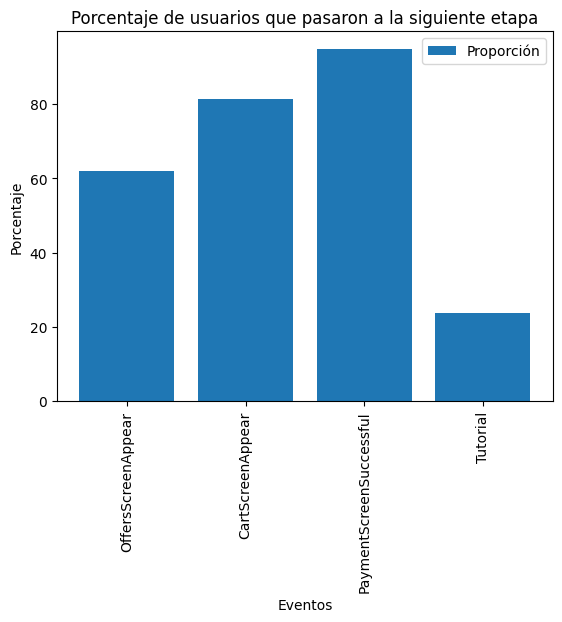

In [13]:

prev_value = users_per_event['deviceId'].shift(1)
users_per_event['next_stage_ratio'] = round((users_per_event['deviceId'] / prev_value)*100, 2)
print(users_per_event)

plt.bar(users_per_event['event'], users_per_event['next_stage_ratio'], label='Proporción')

plt.legend()
plt.xticks(rotation=90)
plt.title('Porcentaje de usuarios que pasaron a la siguiente etapa')
plt.ylabel('Porcentaje')
plt.xlabel('Eventos')

users_payment = round((users_per_event[users_per_event['event'].str.contains('Payment')].iloc[0,1] / users_per_event[users_per_event['event'].str.contains('Main')].iloc[0,1]) * 100,2)  
print('El porcentaje de usuarios que hacen un pago desde su primer evento es de', users_payment)

En la etapa del tutorial es cuando más se pierden usuarios en comparación con su evento anterior, ya que baja hasta 23.74 %, y el porcentaje de usuarios que realizaron su pago desde su primer evento es de 47.7 %, lo cual es muy buen número. Sin embargo, se debe de investigar más a fondo para saber si esta conversión se debe a un grupo en específico.

## Estudiar los resultados del experimento ##

### Cuántos usuarios hay en cada grupo? ###

   group  deviceId
0    246      2484
1    247      2513
2    248      2537


Text(0.5, 0, 'Grupo')

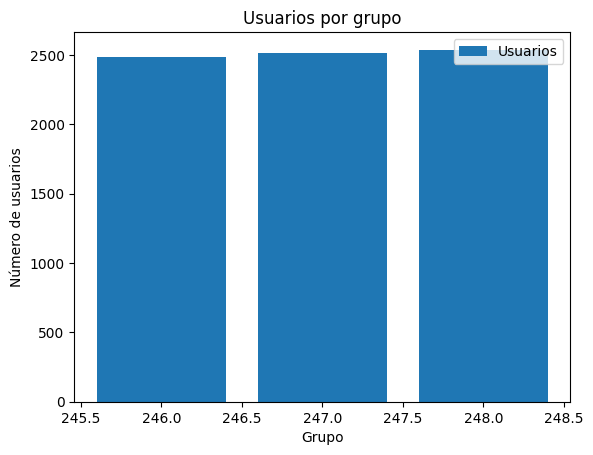

In [14]:
users_per_group = cleaned_log.groupby('group', as_index = False).agg({'deviceId' : 'nunique'})
print(users_per_group)

plt.bar(round(users_per_group['group']), users_per_group['deviceId'], label='Usuarios')

plt.legend()
plt.title('Usuarios por grupo')
plt.ylabel('Número de usuarios')
plt.xlabel('Grupo')


La cantidad de usuarios en los 3 grupos de los registros son muy similares, por lo que podemos proceder a hacer el análisis.

### Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247 ###

In [15]:
# En esta sección obtengo las filas de los grupos 246 y 247 divididas
users_group_246 = cleaned_log[cleaned_log['group'] == 246]
users_group_247 = cleaned_log[cleaned_log['group'] == 247]

# Obtengo el porcentaje de eventos ocurridos 
users_per_event_246 = users_group_246.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
total_users_246 = sum(users_per_event_246['deviceId'])
users_per_event_246['ratio'] = (users_per_event_246['deviceId'] / total_users_246) 

users_per_event_247 = users_group_247.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
total_users_247 = sum(users_per_event_247['deviceId'])
users_per_event_247['ratio'] = (users_per_event_247['deviceId'] / total_users_247)

# Obtengo el porcentaje de conversión de la visita a la página principal y el pago 

main_246 = users_per_event_246[users_per_event_246['event'].str.contains('Main')].iloc[0,1]

payment_246 = users_per_event_246[users_per_event_246['event'].str.contains('Payment')].iloc[0,1]

main_247 = users_per_event_247[users_per_event_247['event'].str.contains('Main')].iloc[0,1]
payment_247 = users_per_event_247[users_per_event_247['event'].str.contains('Payment')].iloc[0,1]

p1 = (( payment_246 / main_246 ))  
p2 = (( payment_247 / main_247 ))  

# Proporción del éxito en el dataframe unido
p_combined = (payment_246 + payment_247) / (main_246 + main_247) 

# diferencia entre las proporciones de los datasets
difference = p1 - p2



In [16]:
# obtengo el valor Z de las dos muestras de estos grupos
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/main_246 + 1/main_247))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

alpha = .05

print('p-value: ', p_value)
print('z_value:' , z_value)
if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")



p-value:  0.12044299485641763
z_value: 1.5529168745114943
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


Las pruebas arrojan que las proporciones entre los grupos de control A son iguales, lo que nos da una base sólida que no hubo cambios significativos en las pruebas con grupos diferentes y sin haber modificado las fuentes.


### Selecciona el evento más popular y comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite con los otros eventos. ###

In [17]:
unique_users_per_event_246 = users_group_246.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users_246 = sum(unique_users_per_event_246['deviceId'])
unique_users_per_event_246['ratio'] = (unique_users_per_event_246['deviceId'] / unique_total_users_246) 

unique_users_per_event_247 = users_group_247.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users_247 = sum(unique_users_per_event_247['deviceId'])
unique_users_per_event_247['ratio'] = (unique_users_per_event_247['deviceId'] / unique_total_users_247) 

def events_significance(i):
    # En este apartado obtengo el total de usuarios del evento iterado para los dos grupos
    temp_246 = unique_users_per_event_246[unique_users_per_event_246['event'].str.contains(i)].iloc[0,1]
    temp_247 = unique_users_per_event_247[unique_users_per_event_247['event'].str.contains(i)].iloc[0,1]

    # En este apartado obtengo la proporción de usuarios que realizaron dicho evento contra el total de usuarios
    temp_p1 = unique_users_per_event_246[unique_users_per_event_246['event'].str.contains(i)].iloc[0,2]
    temp_p2 = unique_users_per_event_247[unique_users_per_event_247['event'].str.contains(i)].iloc[0,2]
    temp_p_combined = (temp_246 + temp_247) / (unique_total_users_246 + unique_total_users_247)    
    temp_difference = temp_p1 - temp_p2 
    temp_z_value = temp_difference / mth.sqrt(temp_p_combined * (1 - temp_p_combined) * (1/unique_total_users_246 + 1/unique_total_users_247))
    temp_distr = st.norm(0, 1)
    temp_p_value = (1 - temp_distr.cdf(abs(temp_z_value))) * 2

    #alpha = .05
    print('p_value',temp_p_value)
    print('Para el evento', i)
    if (temp_p_value < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones para el evento", i)
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento", i)
    #print(i, 'total de usuarios 246', temp_246,'ratio', temp_p1 )
    #print(i, 'total de usuarios 247', temp_247,'ratio', temp_p2 )

    print('-----------------------------------------------------------------------------')


for i in (unique_users_per_event_247['event']) :
    events_significance(i)
    #print(unique_users_per_event_247[unique_users_per_event_247['event'].str.contains(i)].iloc[0,2])

p_value 0.3858966521927507
Para el evento MainScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento MainScreenAppear
-----------------------------------------------------------------------------
p_value 0.8681021752547404
Para el evento OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento OffersScreenAppear
-----------------------------------------------------------------------------
p_value 0.7128092356491924
Para el evento CartScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento CartScreenAppear
-----------------------------------------------------------------------------
p_value 0.47805194674197926
Para el evento PaymentScreenSuccessful
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento Payment

Las pruebas arrojan que para cada uno de los eventos no hay una diferencia significativa de proporciones para los grupos 246 y 247, lo que nos confirma que los grupos de control A tienen estabilidad de datos en todas la áreas y que los grupos fueron divididos correctamente.    

<div class="alert alert-block alert-info">
<b>Dudas en esta sección</b> <a class="tocSkip"></a>
Para esta sección donde piden comparar los grupos de control A/A, usé la fórmula vista en el sprint 10 de el estadístico Z para obtener el Z_value, pero siento que no hace sentido los resultados arrojados, por lo que me gustaría saber si ese es el método a seguir o estoy haciendo algo mal en el agrupamiento de los datos. Ya dejé la duda en el discord pero a veces es muy tardado que me contesten por ahí y a veces avanzo en el proyecto y resulta que pedían otra cosa, por eso quiero ver si usaré otro método para las secciones que siguen.
</div>

    
    

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Revisando tu código, hay varios puntos que debes corregir antes de confiar en los resultados del z-test. El cálculo del *p-value* está mal porque usas un valor fijo (`2`) en lugar de la estadística `z` que obtienes (`temp_z_value`), así que siempre da prácticamente el mismo resultado. Además, estás usando porcentajes (0–100) en lugar de proporciones (0–1) en la fórmula del test, lo que puede estar causando conflicto en tus cálculos. También estás tomando como tamaño de muestra (`n`) la suma de usuarios únicos por evento, lo que cuenta usuarios repetidos y no representa el verdadero número de usuarios únicos en cada grupo.

Para corregirlo, primero calcula el número real de usuarios únicos en cada grupo (`n1` y `n2`) con `.nunique()` sobre `deviceId`. Luego, obtén para cada evento el número de usuarios únicos que lo realizaron y divídelo entre `n1` o `n2` para obtener proporciones en \[0,1]. Usa esas proporciones en la fórmula del z-test o, más fácil, la función `proportions_ztest` de `statsmodels`. Finalmente, revisa que el emparejamiento de eventos sea exacto (no `str.contains` salvo que sea intencional) y considera corregir por comparaciones múltiples si analizas varios eventos.

Se que por este medio puede ser un poco más confuso el explicar lo que se debe corregir, por lo que pondré al tanto al equipo para que pueda contactarte y asignarte una tutoría. Saludos!

</div>

### Compara los eventos de cada uno de los grupos de control con el grupo de fuentes alteradas (grupo 248)

In [18]:
# En esta sección obtengo las filas del grupo 248
users_group_248 = cleaned_log[cleaned_log['group'] == 248]


unique_users_per_event_248 = users_group_248.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
unique_total_users_248 = sum(unique_users_per_event_248['deviceId'])
unique_users_per_event_248['ratio'] = (unique_users_per_event_248['deviceId'] / unique_total_users_248)

# Creo un series de los grupos de control A/A para usarlo en el for de la función
Agroups = [246,247]

def events_significance(i):
    for gr in Agroups:
        if gr == 246: # Aquí asigno valores dependiendo del número de grupo para comparar ambos grupos 246 y 247 con 248 individualmente
            temp_A = unique_users_per_event_246[unique_users_per_event_246['event'].str.contains(i)].iloc[0,1]
            temp_p1 = unique_users_per_event_246[unique_users_per_event_246['event'].str.contains(i)].iloc[0,2]
            temp_users_per_event = unique_users_per_event_246[unique_users_per_event_246['event'].str.contains(i)].iloc[0,1] 
            temp_total_users_group = unique_total_users_246
        elif gr == 247:
            temp_A = unique_users_per_event_247[unique_users_per_event_247['event'].str.contains(i)].iloc[0,1] 
            temp_p1 = unique_users_per_event_247[unique_users_per_event_247['event'].str.contains(i)].iloc[0,2]
            temp_users_per_event = unique_users_per_event_247[unique_users_per_event_247['event'].str.contains(i)].iloc[0,1]
            temp_total_users_group = unique_total_users_247  
        # En este apartado obtengo el total de usuarios del evento iterado para el grupo 248
        temp_248 = unique_users_per_event_248[unique_users_per_event_248['event'].str.contains(i)].iloc[0,1]

        # En este apartado obtengo la proporción de usuarios que realizaron dicho evento contra el total de usuarios para entre los grupos de control y el 248
        
        temp_p2 = unique_users_per_event_248[unique_users_per_event_248['event'].str.contains(i)].iloc[0,2]
        temp_p_combined = (temp_users_per_event + temp_248) / (temp_total_users_group + unique_total_users_248)    
        temp_difference = temp_p1 - temp_p2 
        temp_z_value = temp_difference / mth.sqrt(temp_p_combined * (1 - temp_p_combined) * (1/temp_total_users_group + 1/unique_total_users_248))
        temp_distr = st.norm(0, 1)
        temp_p_value = (1 - temp_distr.cdf(abs(temp_z_value))) * 2

        #alpha = .05
        print('p_value',temp_p_value)
        print('grupo', gr, 'y 248', 'evento', i )
        if (temp_p_value < alpha):
            print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones para el evento", i)
        else:
            print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento", i)

        print('-----------------------------------------------------------------------------')


for i in (unique_users_per_event_248['event']) :
    events_significance(i)

p_value 0.3609079955734189
grupo 246 y 248 evento MainScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento MainScreenAppear
-----------------------------------------------------------------------------
p_value 0.9639563483639422
grupo 247 y 248 evento MainScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento MainScreenAppear
-----------------------------------------------------------------------------
p_value 0.9023600695671781
grupo 246 y 248 evento OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento OffersScreenAppear
-----------------------------------------------------------------------------
p_value 0.9652764391597208
grupo 247 y 248 evento OffersScreenAppear
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferen

La prueba nos arroja que en todos los eventos, tanto de los grupos de control 246 y 247, no hubo cambios significativos con respecto al grupo 248. Esto lo podemos interpretar como que a pesar de los cambios que hayan hecho para usarlos con el grupo 248, realmente no hubo mejoría en cuanto a las compras de acuerdo a la cantidad de usuarios que visitaron la página principal y no influyeron en el comportamiento de los usuarios en sus compra. 

### Compara cada uno de los eventos de los grupos de control 246 y 247 combinados con el grupo de fuentes alteradas (grupo 248)

In [19]:
# Obtengo los las filas de los grupos 246 y 247
users_group_A= cleaned_log[(cleaned_log['group'] == 246) | (cleaned_log['group'] == 247)]


# Obtengo el porcentaje de eventos ocurridos de ambos grupos 246 y 247 para usuarios únicos
users_per_event_A = users_group_A.groupby(['event'], as_index = False).agg({'deviceId' : 'nunique'}).sort_values(by = 'deviceId', ascending = False)
total_users_A = sum(users_per_event_A['deviceId'])
users_per_event_A['ratio'] = (users_per_event_A['deviceId'] / total_users_A) 

def events_significance(i):
    # En este apartado obtengo el total de usuarios del evento iterado para los dos grupos de control combinados y los del grupo 248
    temp_ratio_A = users_per_event_A[users_per_event_A['event'].str.contains(i)].iloc[0,1]
    temp_248 = unique_users_per_event_248[unique_users_per_event_248['event'].str.contains(i)].iloc[0,1]

    # En este apartado obtengo la proporción de usuarios que realizaron dicho evento contra el total de usuarios
    temp_p1 = users_per_event_A[users_per_event_A['event'].str.contains(i)].iloc[0,2]
    temp_p2 = unique_users_per_event_248[unique_users_per_event_248['event'].str.contains(i)].iloc[0,2]
    temp_p_combined = (temp_ratio_A + temp_248) / (total_users_A + unique_total_users_248)    
    temp_difference = temp_p1 - temp_p2 
    temp_z_value = temp_difference / mth.sqrt(temp_p_combined * (1 - temp_p_combined) * (1/total_users_A + 1/unique_total_users_248))
    temp_distr = st.norm(0, 1)
    temp_p_value = (1 - temp_distr.cdf(abs(temp_z_value))) * 2
    #alpha = .05
    print('p_value',temp_p_value)
    #print(temp_z_value)
    if (temp_p_value < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones para el evento", i)
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento", i)
    #print(i, 'total de usuarios 246', temp_246,'ratio', temp_p1 )
    #print(i, 'total de usuarios 247', temp_247,'ratio', temp_p2 )

    print('-----------------------------------------------------------------------------')


for i in (unique_users_per_event_247['event']) :
    events_significance(i)


p_value 0.5788662739778654
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento MainScreenAppear
-----------------------------------------------------------------------------
p_value 0.9632552450549274
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento OffersScreenAppear
-----------------------------------------------------------------------------
p_value 0.5455155272809691
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento CartScreenAppear
-----------------------------------------------------------------------------
p_value 0.9894457199755546
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes para el evento PaymentScreenSuccessful
-----------------------------------------------------------------------------
p_value 0.9263526980067287
No se pudo recha

De igual manera, con la prueba  de los grupos de control combinados comparándolos con el grupo 248, no hubo cambios significativos en los eventos. La conversión se mantuvo igual en proporción con las visitas a la página principal, por lo que podemos confirmar que los cambios realizados en los grupos 248, no se vieron reflejados en más ventas con la misma proporción de visitantes.

## CONCLUSIONES

El nivel de significancia utilizado en cada una de las pruebas de hipótesis fue del .05 en aproximadamente 21 pruebas de hipótesis, en las cuales, todas rechazaron la hipótesis alternativa de que había diferencia significativa en las proporciones de los grupos por eventos. Si modificamos el nivel de significancia alfa a otros generalmente aceptados igual tendremos los mismo resultados, ya que el p-value en estas pruebas ha sido muy alto y se aleja por mucho de cualquier nivel de significancia establecido generalmente, a excepción de una prueba que es la de las pruebas de diferencias estadísticas de los grupos 246 y 247, ya que si tomamos en cuenta que tenemos aproximadamente 21 pruebas de hipótesis, un nivel de significancia de .2 nos daría 2 resultados en cada 20 que podría ser falso, y sería en esa prueba. Sin embargo, podríamos también catalogarlo como un error de tipo I, ya que no se observan diferencias a simple vista y nos arroja el resultado de rechazar la hipótesis nula de que no hay diferencias. 

De igual manera, vemos que realmente no hay diferencias significativas entre las proporciones de todos los grupos que fueron evaluados, por lo que también la probabilidad de obtener un error de tipo I (un falso positivo) es prácticamente nulo usando el nivel de significancia del .05, ya que no hay diferencias reales entre los grupos y tampoco obtuvimos un valor p menor que el nivel de significancia. 

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Te felicito! Realizaste un muy buen análisis de los grupos de tratamiento entre los cambios obtenidos entre uno y otro respecto al funnel que el usuario debe seguir, tus conclusiones son muy acertadas y siempre argumentadas con los datos obtenidos a partir de tus cálculos. 
    
No cabe duda que vas por excelente camino para convertirte en Data Analyst, saludos!
</div>